In [35]:
import os
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv

In [36]:
# === Chargement des variables d'environnement ===
load_dotenv()
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [37]:
# === Connexion à la base PostgreSQL RDS ===
try:
    engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")
    df = pd.read_sql("SELECT * FROM jobs", con=engine)
    print("✅ Données chargées depuis RDS avec succès")
except Exception as e:
    print("Erreur de connexion à la base RDS :", e)
    df = pd.DataFrame()  # On crée un df vide pour éviter de planter la suite

✅ Données chargées depuis RDS avec succès


In [38]:
# Nettoyage de base
if not df.empty:
    df.dropna(subset=["title", "company", "location"], inplace=True)
    df["title"] = df["title"].str.lower().str.strip()
    df["company"] = df["company"].str.strip()
    df["location"] = df["location"].str.strip()

    # Aperçu des données
    print("\nAperçu des données :")
    print(df.head())


Aperçu des données :
   id                                   title                company  \
0   1          staff data scientist  featured  Mozilla  Remote-first   
1   2  associate cloud data scientist (m/f/d)              TD SYNNEX   
2   3         (usa) principal, data scientist                Walmart   
3   4    principal, data scientist – converse                Walmart   
4   5                          data scientist               Sun Life   

                                            location  salary_min  salary_max  \
0  Remote Canada\nRemote Canada\nFull Time\nSenio...         NaN         NaN   
1  Barcelona, Spain\nBarcelona, Spain\nFull Time\...         NaN         NaN   
2  (USA) Bentonville Global Tech …\n(USA) Bentonv...         NaN         NaN   
3  (USA) SUNNYVALE IV- 680 …\n(USA) SUNNYVALE IV-...         NaN         NaN   
4  Sun Life Global Solutions …\nSun Life Global S...         NaN         NaN   

  contract_type       source description created category  
0   

In [39]:
# === Visualisation 1 : Offres par ville ===
df_city = df["location"].value_counts().head(15).reset_index()
df_city.columns = ["city", "count"]
fig1 = px.bar(df_city, x="city", y="count", title="Top 10 des villes avec le plus d'offres")
fig1.show()

In [40]:
 # === Visualisation 2 : Entreprises qui recrutent le plus ===
df_company = df["company"].value_counts().head(15).reset_index()
df_company.columns = ["company", "count"]
fig2 = px.pie(df_company, names="company", values="count", title="Top entreprises qui recrutent")
fig2.show()

In [ ]:
    # === Visualisation 3 : Distribution des salaires ===
    df_salaire = df.dropna(subset=["salary_min", "salary_max"])
    fig3 = px.box(df_salaire, y="salary_max", points="all", title="Distribution des salaires max")
    fig3.show()

In [42]:
    # === Visualisation 4 : Offres par source ===
    df_source = df["source"].value_counts().reset_index()
    df_source.columns = ["source", "count"]
    fig4 = px.pie(df_source, names="source", values="count", title="Origine des offres (API vs Scraping)")
    fig4.show()

In [43]:
    # === Visualisation 5 : Top intitulés de poste ===
    df_title = df["title"].value_counts().head(15).reset_index()
    df_title.columns = ["title", "count"]
    fig5 = px.bar(df_title, x="title", y="count", title="Top intitulés de poste")
    fig5.show()

In [44]:
    # === Visualisation 7 : Nombre d'offres avec ou sans salaire ===
    df["has_salary"] = df["salary_min"].notnull() & df["salary_max"].notnull()
    salary_counts = df["has_salary"].value_counts().rename({True: "Avec salaire", False: "Sans salaire"})
    fig7 = px.pie(values=salary_counts.values, names=salary_counts.index, title="Présence des salaires dans les offres")
    fig7.show()

In [45]:
    # === Insight exemple ===
    print("\n🔎 Insight :")
    print("La majorité des offres viennent de :", df["source"].value_counts().idxmax())
    print("Nombre d'offres avec salaire renseigné :", len(df_salaire))



🔎 Insight :
La majorité des offres viennent de : Adzuna API
Nombre d'offres avec salaire renseigné : 192


In [46]:
    # === Insights supplémentaires ===
    print("\n🔎 Insights supplémentaires :")
    print("1. Nombre total d'offres :", len(df))
    print("2. Nombre d'entreprises uniques :", df["company"].nunique())
    print("3. Nombre de villes uniques :", df["location"].nunique())
    print("4. Intitulé de poste le plus fréquent :", df["title"].mode()[0])
    print("5. Entreprise ayant posté le plus d'offres :", df["company"].value_counts().idxmax())
    print("6. Salaire moyen max :", df["salary_max"].dropna().mean())
    print("7. Salaire médian min :", df["salary_min"].dropna().median())
    print("8. Pourcentage d'offres avec salaire renseigné :", round(df["has_salary"].mean() * 100, 2), "%")
    print("9. Nombre d'intitulés de poste uniques :", df["title"].nunique())
    print("10. Répartition API vs Scraping :")
    print(df["source"].value_counts(normalize=True) * 100)



🔎 Insights supplémentaires :
1. Nombre total d'offres : 1399
2. Nombre d'entreprises uniques : 631
3. Nombre de villes uniques : 366
4. Intitulé de poste le plus fréquent : formation data science
5. Entreprise ayant posté le plus d'offres : DATASCIENTEST
6. Salaire moyen max : 41242.135416666664
7. Salaire médian min : 38000.0
8. Pourcentage d'offres avec salaire renseigné : 13.72 %
9. Nombre d'intitulés de poste uniques : 968
10. Répartition API vs Scraping :
source
Adzuna API         78.627591
AI-jobs.net        10.721944
API Pôle Emploi    10.650465
Name: proportion, dtype: float64


/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_37260/2730647099.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




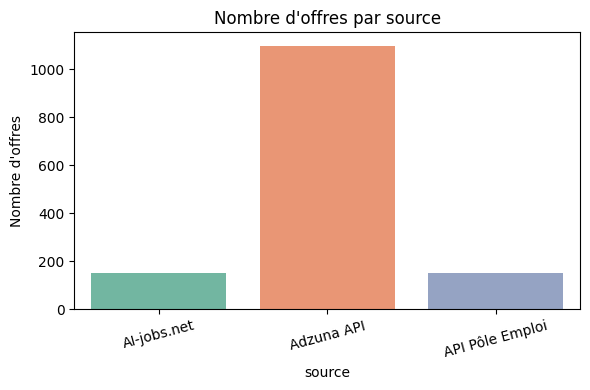

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="source", palette="Set2")
plt.title("Nombre d'offres par source")
plt.ylabel("Nombre d'offres")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_37260/3815129190.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




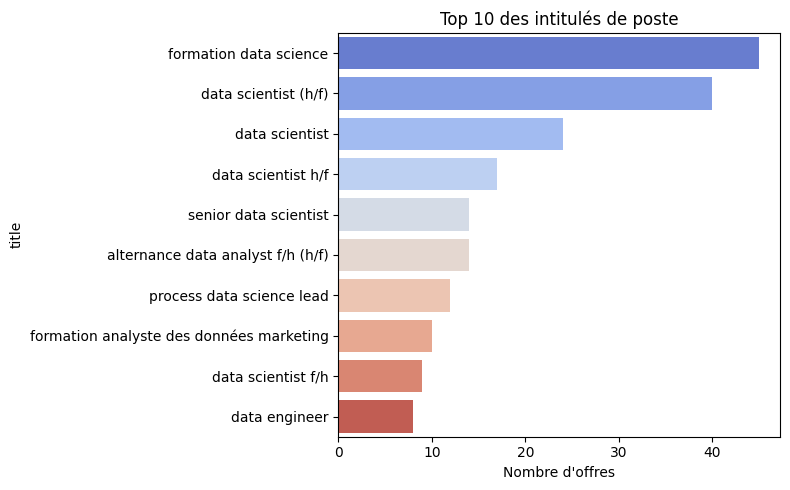

In [48]:
top_titles = df["title"].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_titles.values, y=top_titles.index, palette="coolwarm")
plt.title("Top 10 des intitulés de poste")
plt.xlabel("Nombre d'offres")
plt.tight_layout()
plt.show()


/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_37260/2848530732.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




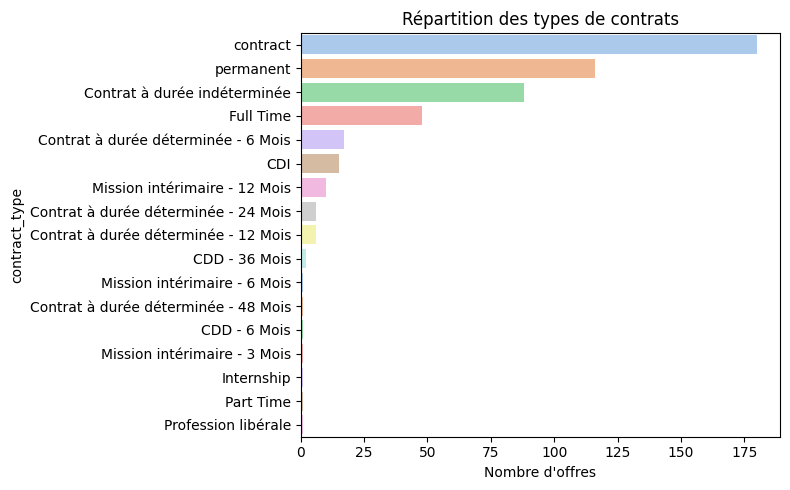

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y="contract_type", order=df["contract_type"].value_counts().index, palette="pastel")
plt.title("Répartition des types de contrats")
plt.xlabel("Nombre d'offres")
plt.tight_layout()
plt.show()


In [50]:
print("Statistiques sur salary_min :\n", df["salary_min"].describe())
print("Statistiques sur salary_max :\n", df["salary_max"].describe())


Statistiques sur salary_min :
 count       192.000000
mean      30550.432292
std       29906.124425
min          42.000000
25%         486.000000
50%       38000.000000
75%       46125.000000
max      108000.000000
Name: salary_min, dtype: float64
Statistiques sur salary_max :
 count       192.000000
mean      41242.135417
std       45375.620944
min          47.000000
25%        1802.000000
50%       42500.000000
75%       60000.000000
max      192000.000000
Name: salary_max, dtype: float64


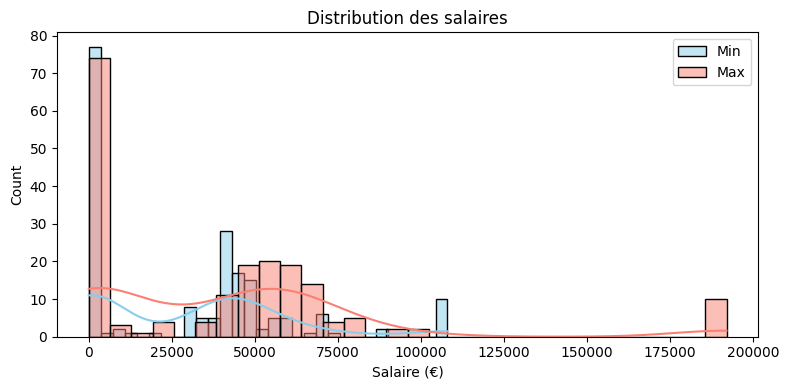

In [51]:
plt.figure(figsize=(8, 4))
sns.histplot(df["salary_min"], bins=30, color='skyblue', label="Min", kde=True)
sns.histplot(df["salary_max"], bins=30, color='salmon', label="Max", kde=True)
plt.legend()
plt.title("Distribution des salaires")
plt.xlabel("Salaire (€)")
plt.tight_layout()
plt.show()


/var/folders/v8/v3c7t4k970n19r4x71qb_v300000gn/T/ipykernel_37260/3431321117.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




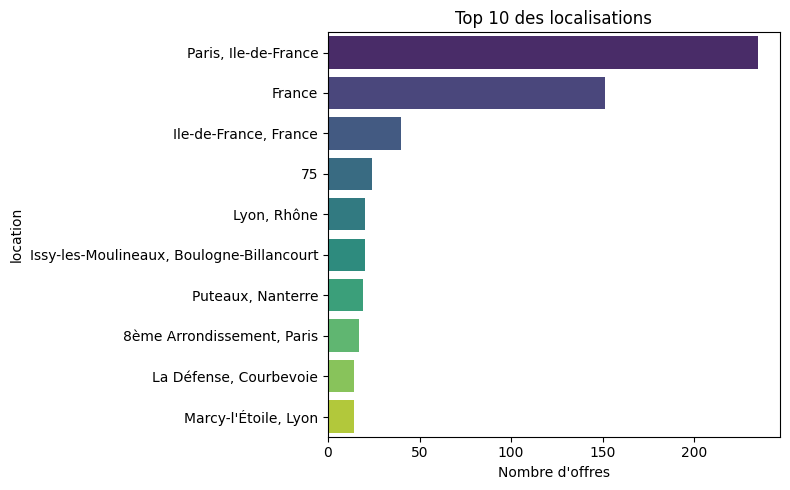

In [52]:
top_locations = df["location"].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.title("Top 10 des localisations")
plt.xlabel("Nombre d'offres")
plt.tight_layout()
plt.show()


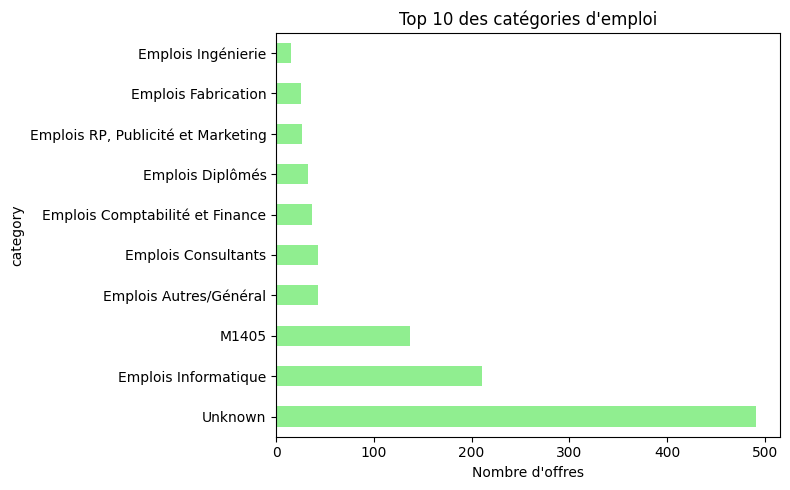

In [53]:
if "category" in df.columns:
    plt.figure(figsize=(8, 5))
    df["category"].value_counts().head(10).plot(kind="barh", color="lightgreen")
    plt.title("Top 10 des catégories d'emploi")
    plt.xlabel("Nombre d'offres")
    plt.tight_layout()
    plt.show()


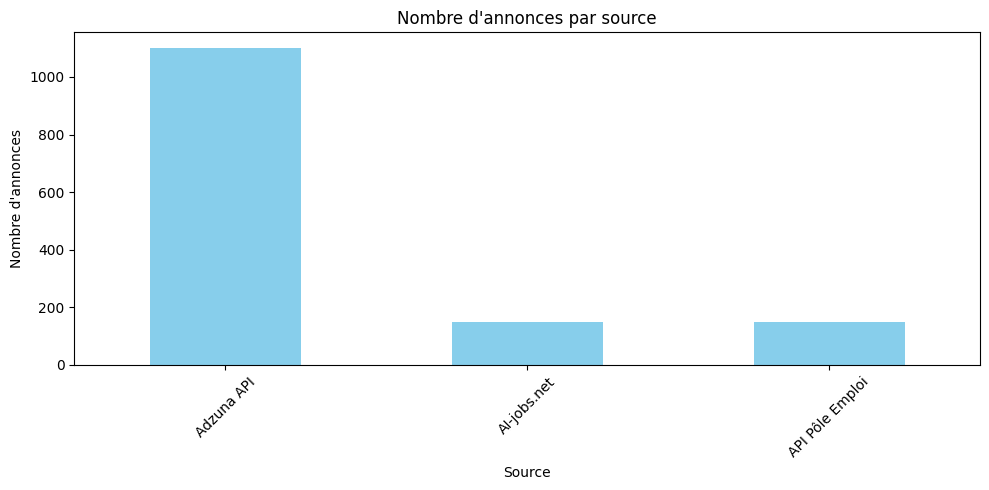


ℹ️ Cette visualisation montre la provenance des offres. Elle permet d'identifier les plateformes les plus actives (ex : Adzuna, Pôle Emploi, AIJobs).


In [54]:
# === 1. Nombre d’annonces par source ===
plt.figure(figsize=(10, 5))
df["source"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Nombre d'annonces par source")
plt.xlabel("Source")
plt.ylabel("Nombre d'annonces")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n\u2139\ufe0f Cette visualisation montre la provenance des offres. Elle permet d'identifier les plateformes les plus actives (ex : Adzuna, Pôle Emploi, AIJobs).")

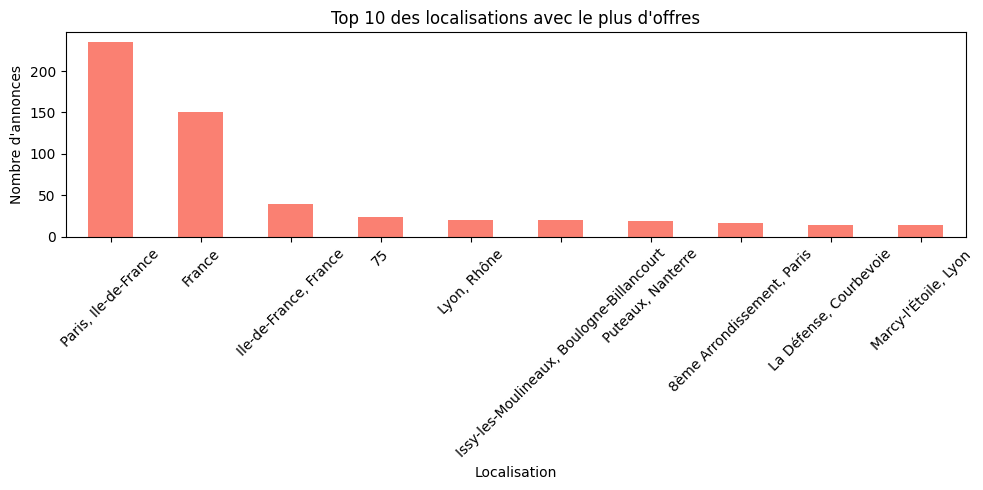


ℹ️ Ce graphique permet de repérer les zones géographiques les plus dynamiques en Data Science.


In [55]:
# === 2. Top localisations ===
plt.figure(figsize=(10, 5))
df["location"].value_counts().head(10).plot(kind="bar", color="salmon")
plt.title("Top 10 des localisations avec le plus d'offres")
plt.xlabel("Localisation")
plt.ylabel("Nombre d'annonces")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n\u2139\ufe0f Ce graphique permet de repérer les zones géographiques les plus dynamiques en Data Science.")

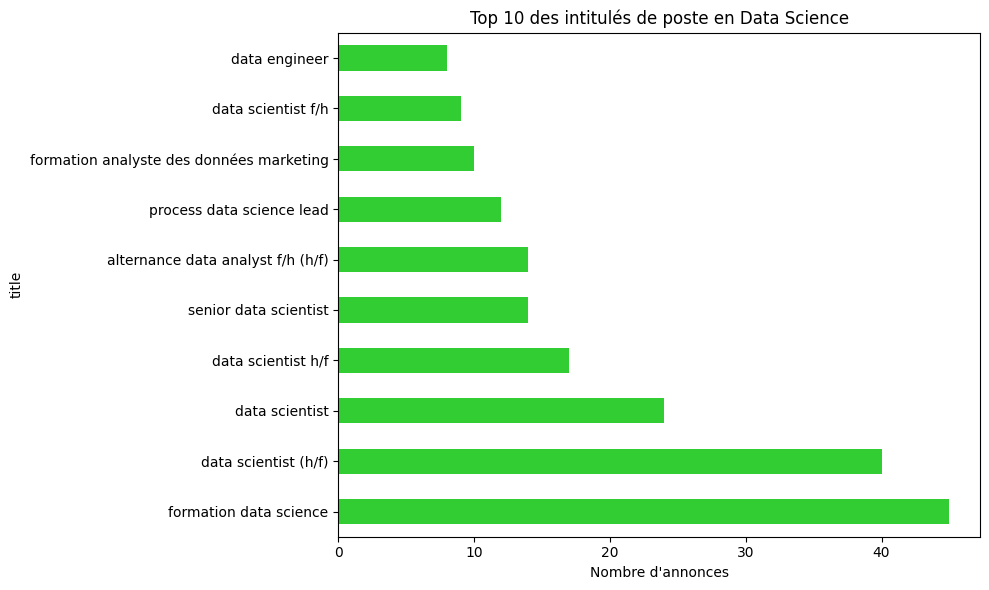


ℹ️ Cette visualisation révèle les métiers les plus demandés (Data Scientist, Analyste, etc.).


In [56]:
# === 3. Intitulés de poste les plus fréquents ===
plt.figure(figsize=(10, 6))
df["title"].value_counts().head(10).plot(kind="barh", color="limegreen")
plt.title("Top 10 des intitulés de poste en Data Science")
plt.xlabel("Nombre d'annonces")
plt.tight_layout()
plt.show()
print("\n\u2139\ufe0f Cette visualisation révèle les métiers les plus demandés (Data Scientist, Analyste, etc.).")


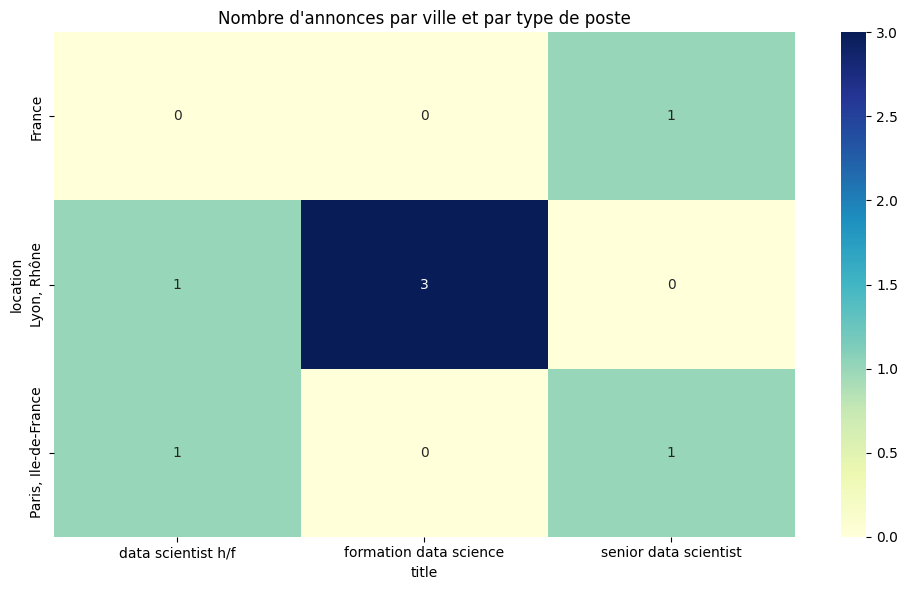


ℹ️ Cette heatmap croise les localisations les plus actives avec les postes les plus récurrents.


In [57]:
# === 6. Croisement Poste vs Localisation ===
top_locations = df["location"].value_counts().head(5).index
top_titles = df["title"].value_counts().head(5).index
heatmap_data = df[df["location"].isin(top_locations) & df["title"].isin(top_titles)]

pivot = pd.crosstab(heatmap_data["location"], heatmap_data["title"])
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Nombre d'annonces par ville et par type de poste")
plt.tight_layout()
plt.show()
print("\n\u2139\ufe0f Cette heatmap croise les localisations les plus actives avec les postes les plus récurrents.")